<a href="https://colab.research.google.com/github/nataliatasso/WMC_notebooks/blob/main/%5BNOTEBOOK_10%5D_Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelos de Classificação e Regressão Logística
Desafio Final

## Importando as bibliotecas

In [ ]:
# Bibliotecas base
import pandas as pd
import numpy as np
import warnings
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.linear_model import LogisticRegression

# Bibliotecas para estatística
from scipy import stats

# Bibliotecas para visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Utilizando o dataset iris, responda:

In [ ]:
iris = datasets.load_iris()


In [ ]:
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['species'] = iris.target
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0



a. Faça uma análise inicial sobre esse dataset

In [ ]:
print(df_iris.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None


In [ ]:
df_iris.value_counts('species')

,count
species,
0,50
1,50
2,50


In [ ]:
print(df_iris.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


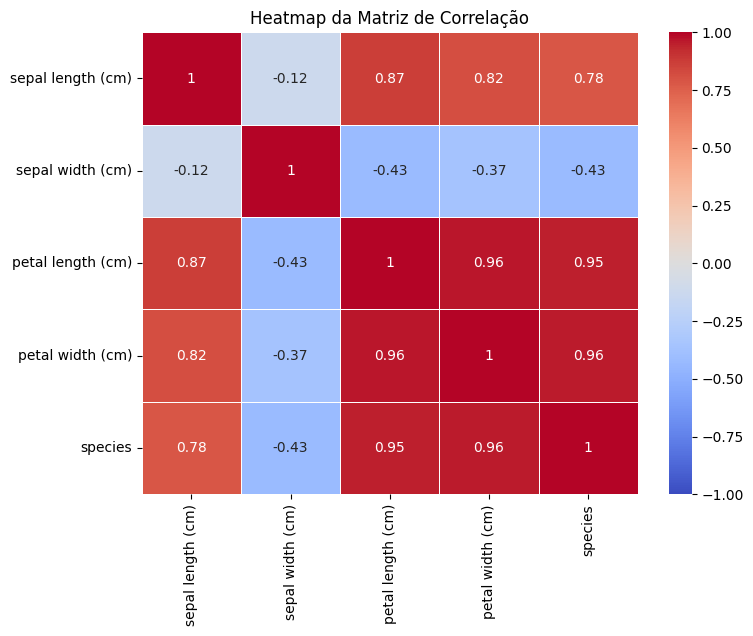

In [ ]:
# Matriz de correlação
correlation_matrix = df_iris.corr()

# Heatmap da matriz de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap da Matriz de Correlação')
plt.show()

b. Use o boxplot e o histograma para caracterizar as propriedades
de cada uma das espécies existentes.

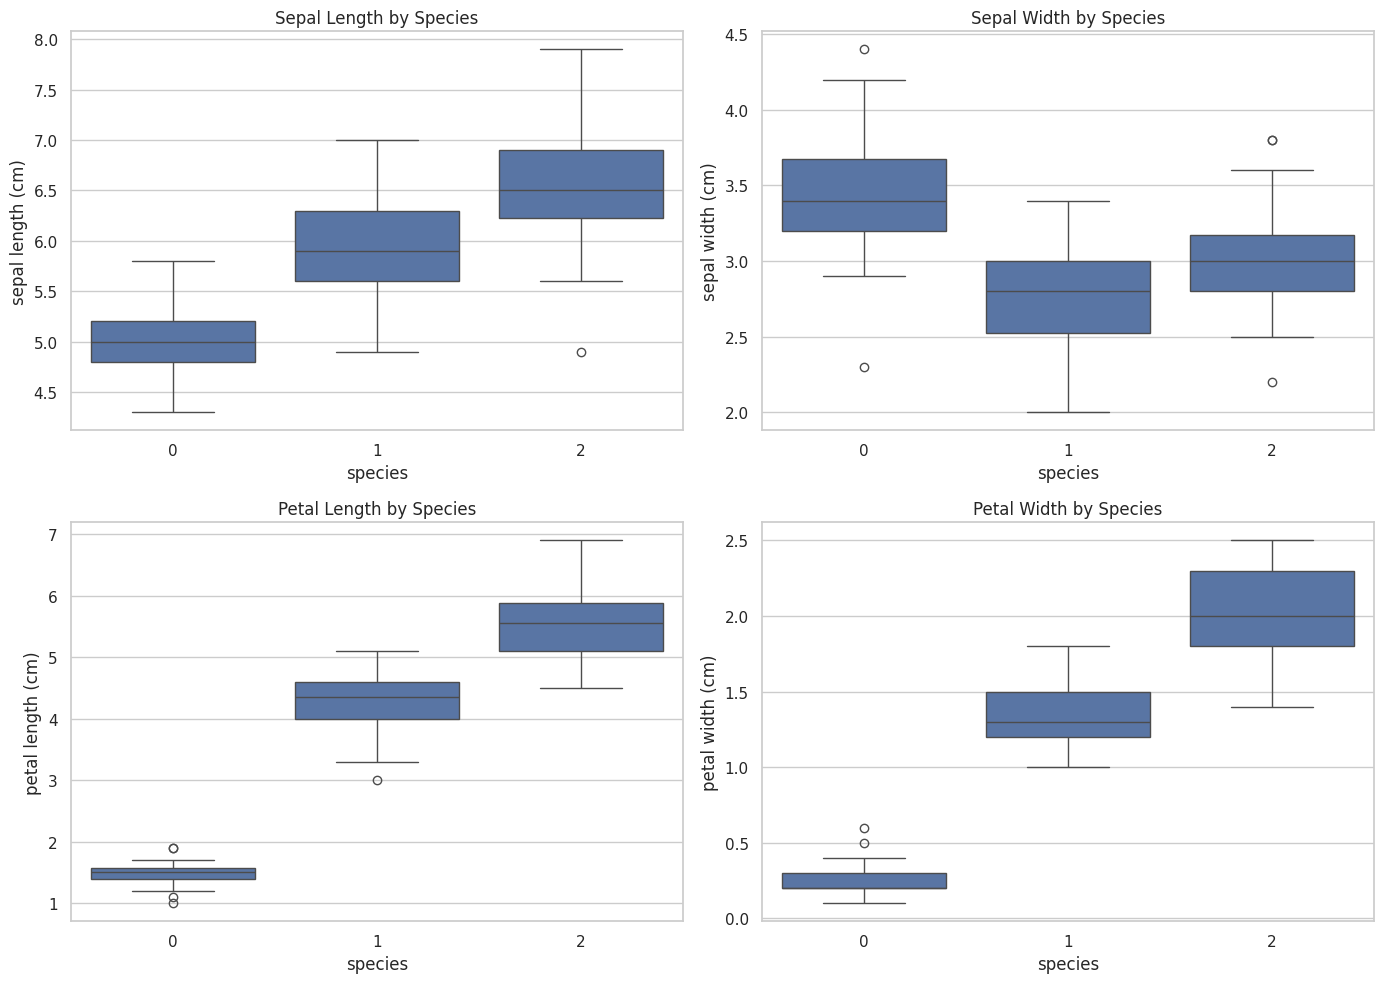

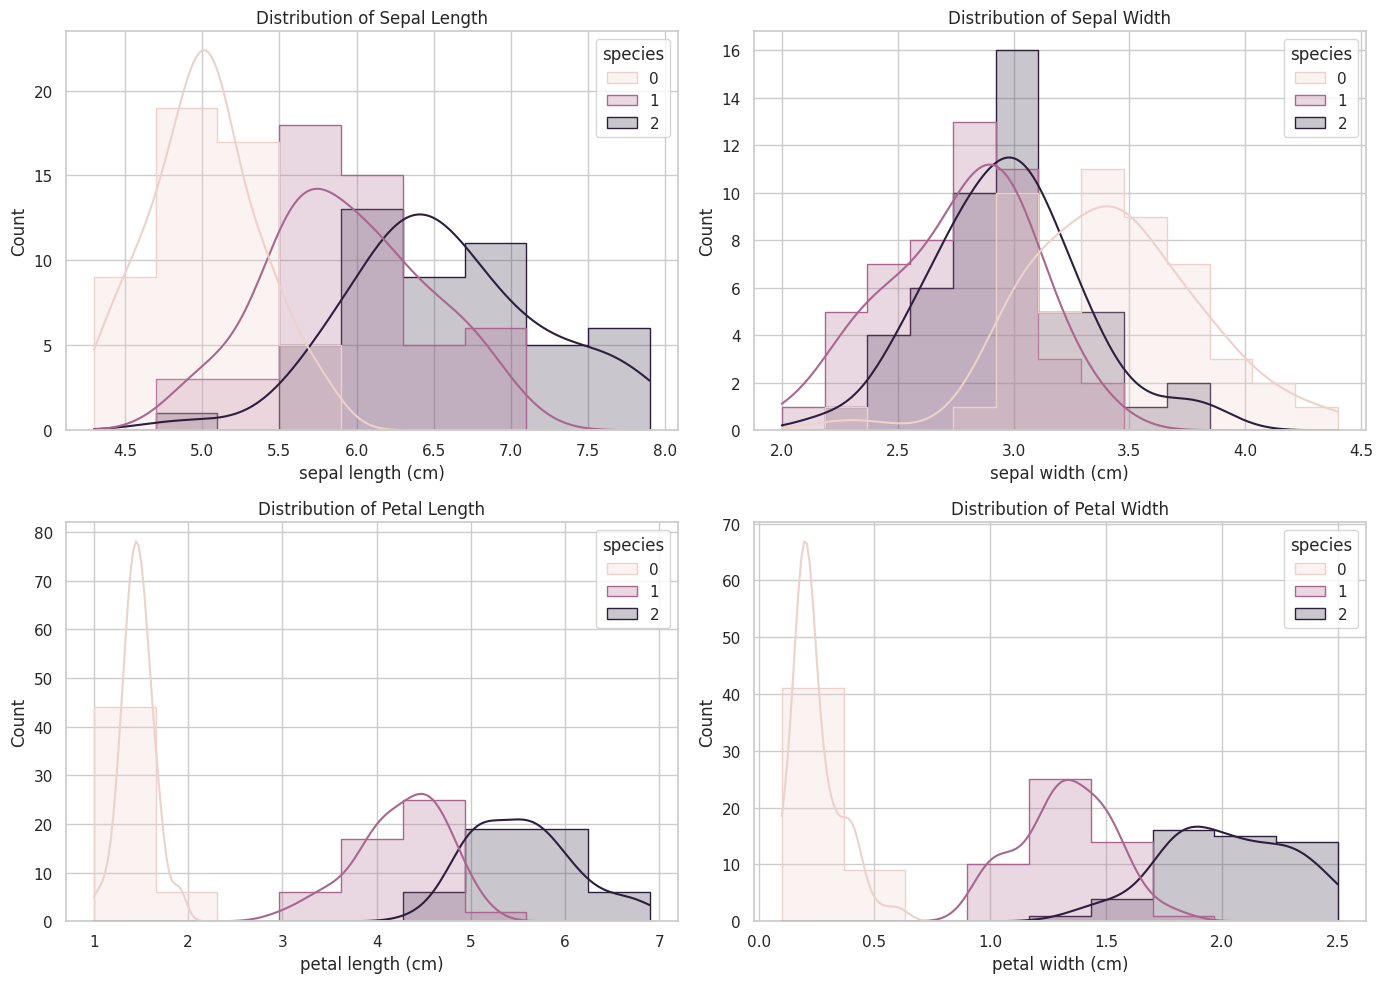

In [ ]:
# Configuração estética do Seaborn
sns.set(style="whitegrid")

# Boxplot para todas as características por espécie
plt.figure(figsize=(14, 10))

# Criação de subplots para os boxplots
plt.subplot(2, 2, 1)
sns.boxplot(x="species", y="sepal length (cm)", data=df_iris)
plt.title('Sepal Length by Species')

plt.subplot(2, 2, 2)
sns.boxplot(x="species", y="sepal width (cm)", data=df_iris)
plt.title('Sepal Width by Species')

plt.subplot(2, 2, 3)
sns.boxplot(x="species", y="petal length (cm)", data=df_iris)
plt.title('Petal Length by Species')

plt.subplot(2, 2, 4)
sns.boxplot(x="species", y="petal width (cm)", data=df_iris)
plt.title('Petal Width by Species')

plt.tight_layout()
plt.show()

# Histogramas para cada variável dividida por espécie
plt.figure(figsize=(14, 10))

# Criação de subplots para os histogramas
plt.subplot(2, 2, 1)
sns.histplot(data=df_iris, x="sepal length (cm)", hue="species", kde=True, element="step")
plt.title('Distribution of Sepal Length')

plt.subplot(2, 2, 2)
sns.histplot(data=df_iris, x="sepal width (cm)", hue="species", kde=True, element="step")
plt.title('Distribution of Sepal Width')

plt.subplot(2, 2, 3)
sns.histplot(data=df_iris, x="petal length (cm)", hue="species", kde=True, element="step")
plt.title('Distribution of Petal Length')

plt.subplot(2, 2, 4)
sns.histplot(data=df_iris, x="petal width (cm)", hue="species", kde=True, element="step")
plt.title('Distribution of Petal Width')

plt.tight_layout()
plt.show()

c. Somente olhando esses gráficos, é possível utilizando uma ou
mais das propriedades (Sepal_Length, Sepal_Width, Petal_Length,
Petal_Width) que sejam suficientes para diferenciar entre as
diferentes espécies?

Nos gráficos, observamos que três das quatro propriedades analisadas (Sepal_Length, Petal_Length e Petal_Width) apresentam distribuições distintas, o que indica que elas podem ser úteis para diferenciar as espécies. No entanto, a variável Sepal_Width mostra uma significativa sobreposição de valores, especialmente entre as espécies 1 e 2, sugerindo que sua inclusão no modelo pode não contribuir de forma relevante para a distinção entre elas.

d. Aplique a regressão logística para avaliar o modelo de
classificação.

Para aplicar o modelo de regressão logística, seguiremos o método CRISP-DM.

I. Entendimento do problema: Nosso objetivo é prever a espécie da planta com base nas suas dimensões de pétala e sépala. Portanto, nossa variável dependente, ou target, é a espécie da planta.

II. Análise exploratória: A análise exploratória, realizada previamente, indicou que as variáveis Sepal_Length, Petal_Length e Petal_Width possuem distribuições distintas, o que as torna promissoras para o modelo de classificação. Além disso, verificamos que não há valores ausentes no conjunto de dados e que os outliers são poucos. Observamos também que o conjunto está balanceado, com 50 observações para cada espécie, o que elimina a necessidade de técnicas de balanceamento, como oversampling ou undersampling. Por fim, a variável target já está numérica, facilitando a interpretação pelo modelo.

III. Preparação dos dados: Como não há valores ausentes, não precisamos tratar essa questão. Os outliers, embora presentes, são poucos e não representam erros de coleta; portanto, decidimos mantê-los, uma vez que refletem variações reais dos dados. A coluna Sepal_Width será removida, e os dados serão divididos em conjunto de treino (80%) e teste (20%) usando a técnica de random split, dando seguimento à análise.

IV. Depois fazemos a modelagem com os dados de treino.

V. E analisamos a performance com os dados de teste.

VI. O sexto e último passo seria salvar o modelo (deploy), mas esse último passo não será feito.

In [ ]:
# Selecionar as variáveis explicativas e a variável target
X = df_iris[['sepal length (cm)', 'petal length (cm)', 'petal width (cm)']]
y = df_iris['species']

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o modelo de regressão logística multinomial (pois temos 3 categorias)
logreg = LogisticRegression(solver='lbfgs', max_iter=200)
logreg.fit(X_train, y_train)

# Aplicar o modelo na base de teste
y_pred = logreg.predict(X_test)  # Previsão das classes

# Mostrar o output em um novo DataFrame
df_results = X_test.copy()
df_results["Previsao_Modelo"] = y_pred

# Exibir os resultados
df_results.head()

,sepal length (cm),petal length (cm),petal width (cm),Previsao_Modelo
73,6.1,4.7,1.2,1
18,5.7,1.7,0.3,0
118,7.7,6.9,2.3,2
78,6.0,4.5,1.5,1
76,6.8,4.8,1.4,1


e. Calcule a acurácia, precisão e recall.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Calcular métricas ajustadas para multi-classes
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Exibir métricas
print("Acurácia:", accuracy)
print("Precisão (ponderada):", precision)
print("Recall (ponderado):", recall)

Acurácia: 1.0
Precisão (ponderada): 1.0
Recall (ponderado): 1.0


Por se tratar de uma base de dados balanceada, a acurácia seria também uma métrica válida para avaliar o modelo.

f. Plote a matriz de confusao com matplotlib ou seaborn.

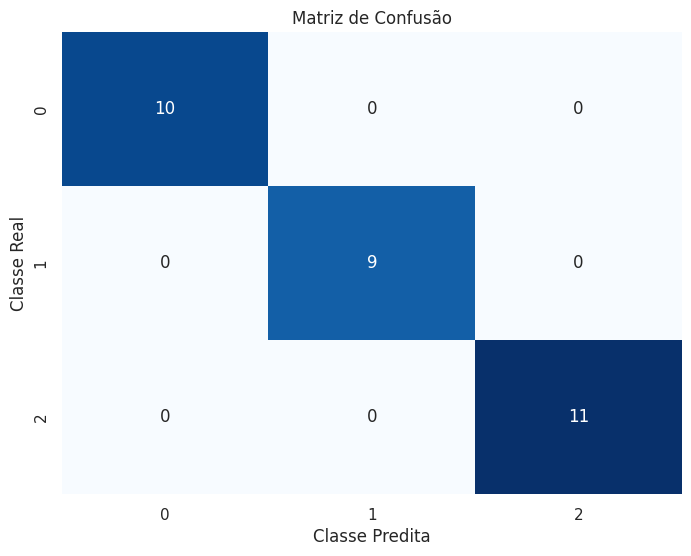

In [ ]:
# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plotar matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()

Vamos, assim, com a matriz de confusão, que o modelo conseguiu ter uma performance perfeita. Isso não necessariamente é positivo, pois pode apontar que houve overfit do modelo, ou seja, o modelo aprendeu demais aquele conjunto de dados, mas não necessariamente irá performar bem em outros conjuntos de dados. Por se tratar de um data frame de teste, é possível que isso tenha influenciado nesse resultado, já que na vida real, dificilmente lidaremos com dados assim tão bem organizados, distribuídos e balanceados.

## 2. Utilizando o dataset load_digits, responda:


In [ ]:
from sklearn.datasets import load_digits

In [ ]:
# Carregar o conjunto de dados
digits = load_digits()

# Criar um DataFrame com os dados
df_digits = pd.DataFrame(data=digits.data, columns=digits.feature_names)

# Adicionar a coluna target (rótulos)
df_digits['target'] = digits.target

# Exibir as primeiras linhas do DataFrame
df_digits.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [ ]:
df_digits.value_counts('target')

,count
target,
3,183
1,182
5,182
4,181
6,181
9,180
7,179
0,178
2,177


a. Faça uma análise inicial sobre esse dataset

i. Quantos dados possui?

ii. Existem dados nulos? Se sim quantos?

iii. Todos são dados numéricos ou existem colunas com dados categóricos?


In [ ]:
# i. Quantos dados possui?
num_linhas, num_colunas = df_digits.shape

# ii. Existem dados nulos? Se sim, quantos?
dados_nulos = df_digits.isnull().sum().sum()

# iii. Todos são dados numéricos ou existem colunas com dados categóricos?
tipos_dados = df_digits.dtypes

# Exibindo as informações
print(f"O dataset possui {num_linhas} linhas e {num_colunas} colunas.")
print(f"Existem {dados_nulos} dados nulos.")
print("Tipos de dados por coluna:")
print(tipos_dados)

O dataset possui 1797 linhas e 65 colunas.
Existem 0 dados nulos.
Tipos de dados por coluna:
pixel_0_0    float64
pixel_0_1    float64
pixel_0_2    float64
pixel_0_3    float64
pixel_0_4    float64
              ...   
pixel_7_4    float64
pixel_7_5    float64
pixel_7_6    float64
pixel_7_7    float64
target         int64
Length: 65, dtype: object


b. Aplique a regressão logística para avaliar o modelo de classificação.


In [ ]:
# Selecionar as variáveis explicativas (pixels) e a variável target (os dígitos)
X_digits = df_digits[digits.feature_names]
y_digits = df_digits['target']

# Dividir os dados em conjunto de treino e teste
X_digits_train, X_digits_test, y_digits_train, y_digits_test = train_test_split(X_digits, y_digits, test_size=0.2, random_state=42)

# Criar e treinar o modelo de regressão logística multinomial (pois temos 10 categorias - dígitos de 0 a 9)
logreg_digits = LogisticRegression(solver='lbfgs', max_iter=2000)
logreg_digits.fit(X_digits_train, y_digits_train)

# Aplicar o modelo na base de teste
y_digits_pred = logreg_digits.predict(X_digits_test)  # Previsão das classes

# Mostrar os resultados no DataFrame
df_results_digits = X_digits_test.copy()
df_results_digits["Previsao_Modelo"] = y_digits_pred

# Exibir os primeiros resultados do DataFrame com as previsões
print(df_results_digits.head())

      pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
1245        0.0        0.0        0.0        7.0       12.0        0.0   
220         0.0        0.0       11.0       16.0        8.0        0.0   
1518        0.0        0.0        8.0       15.0       12.0        4.0   
438         0.0        0.0        2.0       12.0       12.0       12.0   
1270        0.0        2.0       13.0       16.0       10.0        0.0   

      pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_7  pixel_7_0  \
1245        0.0        0.0        0.0        0.0  ...        2.0        0.0   
220         0.0        0.0        0.0        6.0  ...        0.0        0.0   
1518        0.0        0.0        0.0        5.0  ...        0.0        0.0   
438         9.0        2.0        0.0        0.0  ...        0.0        0.0   
1270        0.0        0.0        0.0        6.0  ...        0.0        0.0   

      pixel_7_1  pixel_7_2  pixel_7_3  pixel_7_4  pixel_7_5  pixel_7_6  \
1245  

c. Calcule a acurácia, precisão e recall.


In [ ]:
# Calcular métricas ajustadas para multi-classes
accuracy_digits = accuracy_score(y_digits_test, y_digits_pred)
precision_digits = precision_score(y_digits_test, y_digits_pred, average='weighted')
recall_digits = recall_score(y_digits_test, y_digits_pred, average='weighted')

# Exibir métricas
print("Acurácia:", accuracy)
print("Precisão (ponderada):", precision)
print("Recall (ponderado):", recall)

Acurácia: 1.0
Precisão (ponderada): 1.0
Recall (ponderado): 1.0


d. Plote a matriz de confusão com matplotlib ou seaborn.

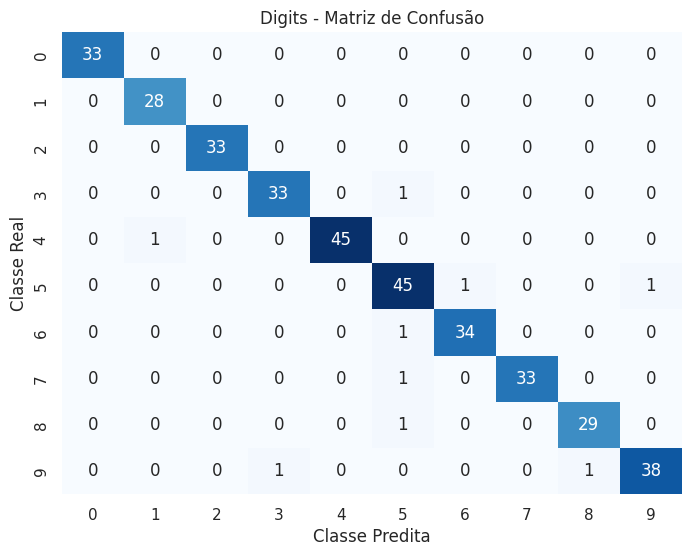

In [ ]:
# Calcular a matriz de confusão
cm_digits = confusion_matrix(y_digits_test, y_digits_pred)

# Plotar matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm_digits, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')
plt.title('Digits - Matriz de Confusão')
plt.show()

e. Aplique a regressão logística para avaliar o modelo de classificação dos
dígitos de 0 a 9 utilizando o conjunto de dados específico para esse problema
(por exemplo, MNIST).

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf

In [ ]:
# Carregar o dataset MNIST
(X_mnist, y_mnist), (X_mnist_test_orig, y_mnist_test_orig) = tf.keras.datasets.mnist.load_data()

# Transformar as imagens (28x28) em vetores de 784 pixels
X_mnist = X_mnist.reshape(X_mnist.shape[0], -1)
X_mnist_test_orig = X_mnist_test_orig.reshape(X_mnist_test_orig.shape[0], -1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Dividir o dataset MNIST para treino e validação
X_mnist_train, X_mnist_val, y_mnist_train, y_mnist_val = train_test_split(X_mnist, y_mnist, test_size=0.2, random_state=42)

# Criar o modelo de regressão logística multinomial (10 classes)
logreg_mnist = LogisticRegression(solver='lbfgs', max_iter=5000)

# Treinar o modelo no conjunto de treino do MNIST
logreg_mnist.fit(X_mnist_train, y_mnist_train)

# Aplicar o modelo na base de validação
y_pred = logreg_mnist.predict(X_mnist_val)  # Previsão das classes

# Mostrar os resultados no DataFrame
df_results = pd.DataFrame(X_mnist_val, columns=[f'Pixel_{i}' for i in range(X_mnist_val.shape[1])])
df_results["Previsao_Modelo"] = y_pred

# Exibir os primeiros resultados do DataFrame com as previsões
df_results.head()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Pixel_0,Pixel_1,Pixel_2,Pixel_3,Pixel_4,Pixel_5,Pixel_6,Pixel_7,Pixel_8,Pixel_9,...,Pixel_775,Pixel_776,Pixel_777,Pixel_778,Pixel_779,Pixel_780,Pixel_781,Pixel_782,Pixel_783,Previsao_Modelo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


f. Calcule a acurácia, precisão e recall com base no desempenho do modelo
para a classificação dos dígitos de 0 a 9.

In [ ]:
# Calcular métricas ajustadas para multi-classes
accuracy = accuracy_score(y_mnist_val, y_pred)
precision = precision_score(y_mnist_val, y_pred, average='weighted')
recall = recall_score(y_mnist_val, y_pred, average='weighted')

# Exibir métricas
print("Acurácia:", accuracy)
print("Precisão (ponderada):", precision)
print("Recall (ponderado):", recall)

Acurácia: 0.9125
Precisão (ponderada): 0.9123000499898257
Recall (ponderado): 0.9125


g. Plote a matriz de confusão dos resultados da classificação dos dígitos de 0
a 9 utilizando matplotlib ou seaborn.

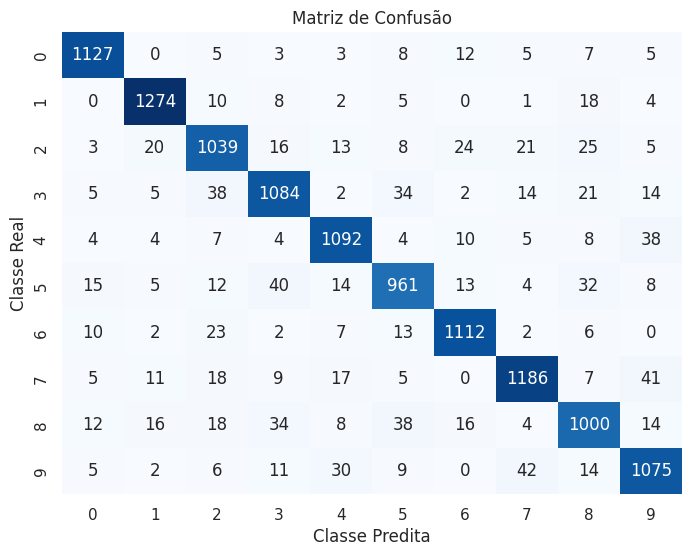

In [ ]:
# Calcular a matriz de confusão
cm = confusion_matrix(y_mnist_val, y_pred)

# Plotar matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()